In [2]:
import sys
sys.path.append("/Users/oukenkou/Google 云端硬盘/2013to2019_Macbook/DRFproject/github_HiC1Dmetrics/HiC1Dmetrics/MainCode")
from calculateMetrics import *
from calculateTwoSample import *
from plotMetrics import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
cmap= LinearSegmentedColormap.from_list("custom1",['#FFFFFF', '#d10a3f'])
import pandas as pd
from sklearn import preprocessing
cmap2= LinearSegmentedColormap.from_list("custom2",['#1310cc', '#FFFFFF', '#d10a3f'])

In [7]:
ss =CompartmentPC1("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21",useNA=True)
rawMT=np.nan_to_num(ss.matrix)

In [8]:
rawMT.mean()

1.541602004335443

In [4]:
ss.blankarray

array([nan, nan, nan, ..., nan, nan, nan])

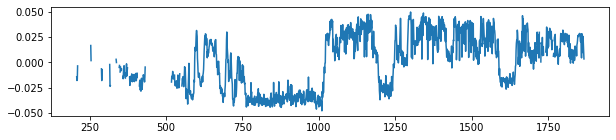

In [5]:
is1 = ss.getPC1(smooth=True).CompartmentPC1
plt.figure(figsize=(10,2))
plt.plot(is1)

In [ ]:
is1 = ss.getCI().ContrastIndex
plt.figure(figsize=(10,2))
plt.plot(is1)

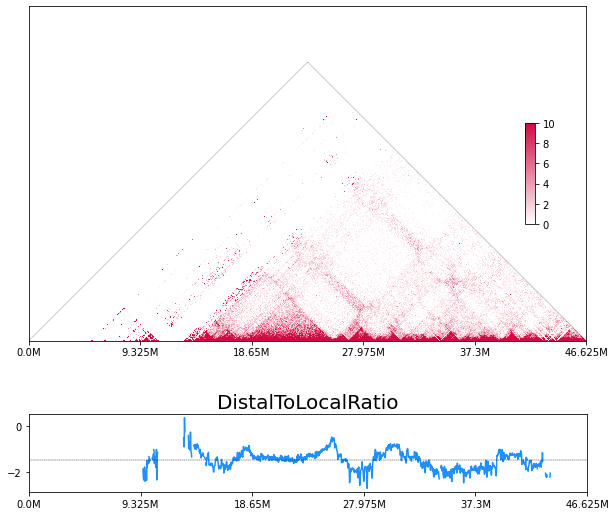

In [6]:
PlotBedGraph("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,chr="chr21",clmax=10).draw("DLR")

In [37]:
allzero = ss.matrix.sum(axis=1) ==0
notallzeroindex = np.array(range(ss.matrix_shape))[~allzero]
nonzeroMT = ss.matrix[~allzero,:][:,~allzero]
nonzeroMT.shape
nonzeroPearson = np.corrcoef(nonzeroMT)

In [43]:
import time
start = time.time()
pd.DataFrame(nonzeroMT).corr()
end = time.time()
print(end-start)

6.254883050918579


In [44]:
start = time.time()
np.corrcoef(nonzeroMT)
end = time.time()
print(end-start)

0.1931779384613037


In [30]:
pearsonMT = pd.DataFrame(np.zeros((ss.matrix_shape,ss.matrix_shape)) *np.NaN)
pearsonMT.iloc[notallzeroindex,notallzeroindex] =nonzeroPearson

In [31]:
pearsonMT

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.376927,0.447004,0.513900,0.622311,0.787534,1.000000,0.842086,0.474234,0.301599,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.406313,0.464136,0.509968,0.568331,0.625696,0.842086,1.000000,0.690932,0.426208,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276242,0.299338,0.306653,0.345129,0.394691,0.474234,0.690932,1.000000,0.802693,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.179566,0.176964,0.176170,0.190147,0.222807,0.301599,0.426208,0.802693,1.000000,NaN


In [175]:
pd.DataFrame(np.corrcoef(ss.matrix))

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.378279,0.448222,0.514932,0.623096,0.787977,1.000000,0.842447,0.475251,0.302584,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.407714,0.465421,0.511096,0.569303,0.626538,0.842447,1.000000,0.691562,0.427043,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277664,0.300734,0.307987,0.346365,0.395836,0.475251,0.691562,1.000000,0.802910,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.180756,0.178175,0.177343,0.191278,0.223891,0.302584,0.427043,0.802910,1.000000,NaN


In [174]:
pd.DataFrame(ss.matrix).corr()

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.378279,0.448222,0.514932,0.623096,0.787977,1.000000,0.842447,0.475251,0.302584,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.407714,0.465421,0.511096,0.569303,0.626538,0.842447,1.000000,0.691562,0.427043,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277664,0.300734,0.307987,0.346365,0.395836,0.475251,0.691562,1.000000,0.802910,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.180756,0.178175,0.177343,0.191278,0.223891,0.302584,0.427043,0.802910,1.000000,NaN


In [3]:
ss.getPC1(signCorr="geneDensity/geneDensity25000.txt")

/Users/oukenkou/Google 云端硬盘/2013to2019_Macbook/DRFproject/github_HiC1Dmetrics/HiC1Dmetrics/MainCode/calculateMetrics.py:218: RuntimeWarning: invalid value encountered in true_divide
  oeMT = np.nan_to_num(rawMT / expectMT)


,chr,start,end,CompartmentPC1
0,chr21,0,25000,NaN
1,chr21,25000,50000,NaN
2,chr21,50000,75000,NaN
3,chr21,75000,100000,NaN
4,chr21,100000,125000,NaN
...,...,...,...,...
1864,chr21,46600000,46625000,0.020906
1865,chr21,46625000,46650000,0.004320
1866,chr21,46650000,46675000,0.007308
1867,chr21,46675000,46700000,-0.000419


In [7]:
ss = CompartmentPC1("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21")

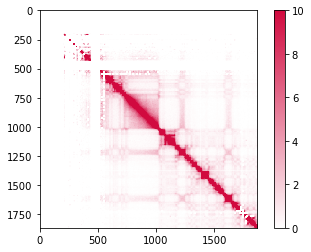

In [8]:
#raw Matrix
plt.imshow(ss.matrix,cmap=cmap,clim=(0,10))
plt.colorbar()

In [10]:
def makeExpect(df):
    num = df.shape[0]
    avg=[]
    for i in range(num):  #间隔为i，格数为num-i
        dig=[]
        for j in range(num):
            if (j+i) < num: dig.append(df[j,j+i])
        avg.append(np.mean(dig))
        
    #for i in range(num):
     #   if avg[i] < a:
       #     for flank in range(num):
         #       biggerBin = avg[i-flank:i+flank+1]
           #     if np.sum(biggerBin)>=1:
             #       avg[i] = np.mean(biggerBin)
               #     break

    expected = np.zeros((num, num))
    for i in range(num):
        for j in range(num):
            if np.isnan(df[i,j]):
                expected[i,j] = np.NaN
            else:
                distance = abs(i-j)
                expected[i,j] = avg[distance]
            
    return(expected)

In [11]:
rawMT = np.nan_to_num(ss.matrix)
expectMT = ss.makeExpect(rawMT)
oeMT = np.nan_to_num(rawMT / expectMT)

allzero = oeMT.sum(axis=1) == 0
notallzeroindex = np.array(range(ss.matrix_shape))[~allzero]

nonzeroMT = oeMT[~allzero,:][:,~allzero]
nonzeroPearson = np.corrcoef(nonzeroMT)
pearsonMT = pd.DataFrame(np.zeros((ss.matrix_shape,ss.matrix_shape)) *np.NaN)
pearsonMT.iloc[notallzeroindex,notallzeroindex] = nonzeroPearson
pearsonMT = np.array(pearsonMT)

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
naPos = np.isnan(pearsonMT).all(axis=1)
pca = PCA(n_components=5)
trained = pca.fit(np.nan_to_num(pearsonMT))
pc1 = trained.components_
array = pc1[0,:]

In [23]:
pca = PCA(n_components=5)
trained = pca.fit(nonzeroPearson)
pc1 = trained.components_
array2 = pc1[0,:]
testaa = np.zeros(ss.matrix_shape) * np.NaN
testaa[notallzeroindex] = array2

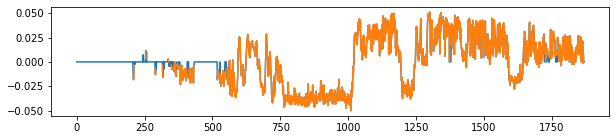

In [32]:
plt.figure(figsize=(10,2))
plt.plot(array)
plt.plot(-testaa)

In [115]:
expectMT = makeExpect(rawMT)

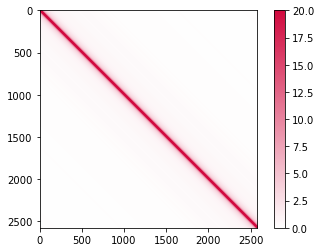

In [116]:
plt.imshow(expectMT,cmap=cmap,clim=(0,20))
plt.colorbar()

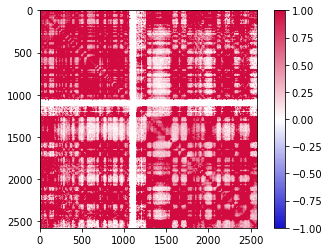

In [117]:
#OE 不log
oe = np.nan_to_num(rawMT / expectMT)
plt.imshow(oe,cmap=cmap2,clim=(-1,1))
plt.colorbar()

allzero = oe.sum(axis=1) == 0
allzeroindex = np.array(range(oe.shape[0]))[allzero]
allnumindex = np.array(range(oe.shape[0]))[~allzero]
oe[allzeroindex,:] = np.NaN
oe[:,allzeroindex] = np.NaN

pearsonMT = pd.DataFrame(oe).corr()

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


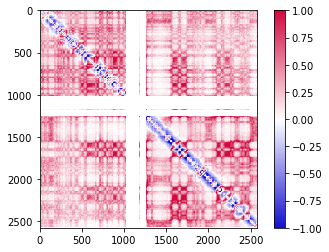

In [83]:
#OE log
oe = np.nan_to_num(rawMT / expectMT)
oelog = np.log(oe)
oelog[np.isinf(oelog)] = 0

allzero = oelog.sum(axis=1) == 0
allzeroindex = np.array(range(oelog.shape[0]))[allzero]
oelog[allzeroindex,:] = np.NaN
oelog[:,allzeroindex] = np.NaN

plt.imshow(oelog,cmap=cmap2,clim=(-1,1))
plt.colorbar()

pearsonMT = pd.DataFrame(oelog).corr()

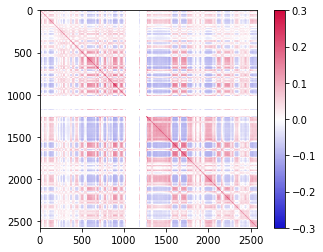

In [118]:
plt.imshow(pearsonMT,cmap=cmap2,clim=(-0.3,0.3))
plt.colorbar()

In [136]:
len(allzeroindex)

108

In [163]:
from scipy import stats
stats.spearmanr(pearsonMT.sum()[allnumindex], b[:,0][allnumindex])

SpearmanrResult(correlation=0.17168280581265072, pvalue=8.544709304230664e-18)

In [134]:
pearsonMT.sum()[allnumindex]

2        4.976415
3       16.292503
4       10.530852
5       10.763012
6       19.643170
          ...    
2569    -1.152370
2570     0.514697
2571    -5.202808
2572    -1.252494
2573     0.536149
Length: 2470, dtype: float64

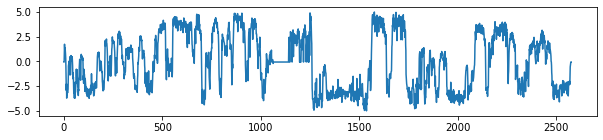

In [144]:
pca = PCA(n_components=5)
mod = pca.fit(np.nan_to_num(pearsonMT))
b=pca.fit_transform(np.nan_to_num(pearsonMT))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

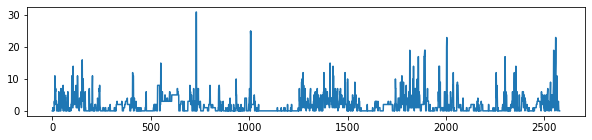

In [158]:
gd = pd.read_csv('geneDensity/geneDensity25000.txt',header=None,sep='\t')
gd21 = np.array(gd[gd[0] == "chr20"][3])
plt.figure(figsize=(10,2))
plt.plot(np.array(gd21))

In [160]:
stats.spearmanr(gd21,b[:,0])

SpearmanrResult(correlation=-0.36061761233847167, pvalue=5.129580664286077e-80)

In [123]:
mod.explained_variance_

array([7.28630564, 0.45088488, 0.1041268 , 0.05795784, 0.0490183 ])

In [86]:
testMT = pearsonMT.loc[allnumindex,allnumindex]

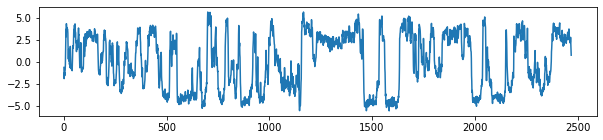

In [87]:
pca = PCA(n_components=5)
b=pca.fit_transform(testMT)
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [38]:
sum(rawMT.sum(axis=1) == 0)

456

In [2]:
isc = InsulationScoreChange("test_data/Rad21KD_1/observed.KR.chr21.matrix.gz","test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21")

In [2]:
dlr = deltaDLR("test_data/Rad21KD_1/observed.KR.chr21.matrix.gz","test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21")

In [14]:
c = InsulationScore("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21").getIS().InsulationScore
t = InsulationScore("test_data/Rad21KD_1/observed.KR.chr21.matrix.gz",25000,"chr21").getIS().InsulationScore

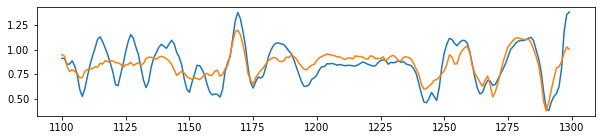

In [18]:
plt.figure(figsize=(10,2))
plt.plot(c[1100:1300])
plt.plot(t[1100:1300])

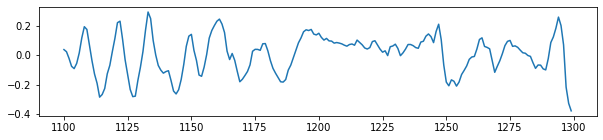

In [7]:
plt.figure(figsize=(10,2))
plt.plot(isc.getISC().InsulationScoreChange[1100:1300])

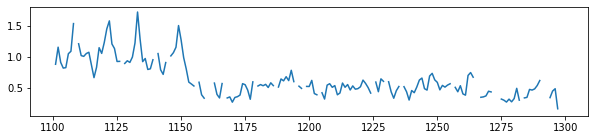

In [4]:
plt.figure(figsize=(10,2))
ddlr = dlr.getDeltaDLR().deltaDLR
plt.plot(ddlr[1100:1300])

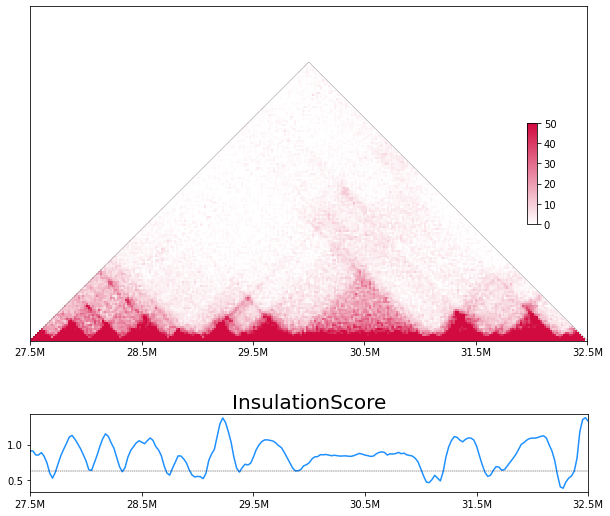

In [9]:
PlotBedGraph("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,startSite=27500000,endSite=32500000,chr="chr21",clmax=50).draw("IS")

In [6]:
ss =CompartmentPC1("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,"chr21")

In [35]:
pc1 = ss.getPC1()

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [36]:
xx = pc1.CompartmentPC1

In [38]:
xx[xx==0] = np.NaN

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


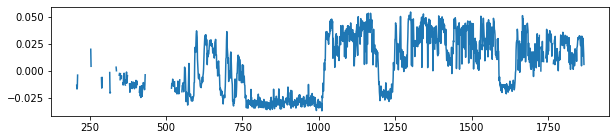

In [39]:
plt.figure(figsize=(10,2))
plt.plot(xx)

In [5]:
def logMT(mt):
    length = mt.shape[0]
    out = np.zeros((length,length))
    for i in range(length):
        for j in range(length):
            if mt[i,j] !=0: out[i,j]=np.log(mt[i,j])
                
    return(out)

In [7]:
rawMT =np.nan_to_num(ss.matrix)
#logObserve = logMT(rawMT)

In [8]:
expectMT = makeExpect(rawMT)
#logExpect = logMT(expectMT)

num =  rawMT.shape[0]

In [12]:
oe = rawMT / expectMT
pearsonMT = np.corrcoef(np.nan_to_num(oe))
pd.DataFrame(pearsonMT)

/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111644,0.210191,0.090464,0.122056,0.071389,1.000000,0.049894,0.142529,0.032480,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019955,0.097926,0.008940,0.046183,-0.006424,0.049894,1.000000,0.084527,0.008251,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100482,0.364416,0.040796,0.363073,-0.004263,0.142529,0.084527,1.000000,0.096008,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071358,0.044935,0.022299,0.055118,0.038104,0.032480,0.008251,0.096008,1.000000,NaN


In [35]:
logoe = np.log(np.nan_to_num(oe))


/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [24]:
naPos = np.isnan(pearsonMT).all(axis=1)

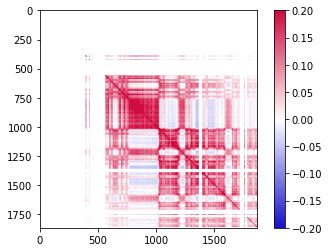

In [14]:
plt.imshow(pearsonMT,cmap=cmap2,clim=(-0.2,0.2))
plt.colorbar()

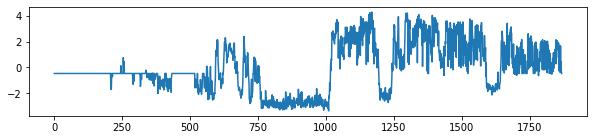

In [15]:
pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pearsonMT))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [29]:
pc1 = b[:,0]
pc1[naPos] = np.NaN

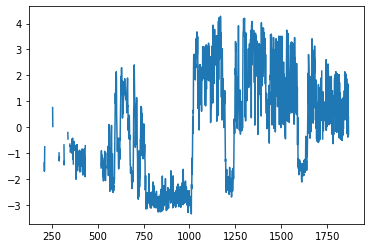

In [31]:
plt.plot(pc1)

In [61]:
xx = oe[oe>0]
np.log(xx[xx<1])

array([-0.10219389, -0.10219389, -0.05586972, ..., -0.1259513 ,
       -0.02346996, -0.00115846])

/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


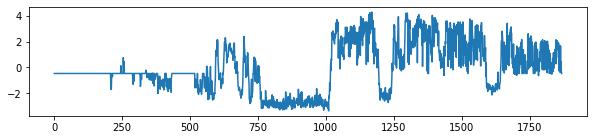

In [37]:
oelog = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        if oe[i,j] != 0:
            oelog[i,j] = np.log(oe[i,j])
            
pearsonLOG = np.corrcoef(np.nan_to_num(oe))

pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pearsonLOG))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [64]:
oelog[oelog<0].min()

-1.017723409638578

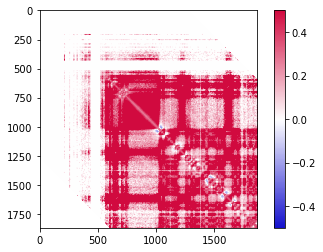

In [65]:
plt.imshow(oelog,cmap=cmap2,clim=(-0.5,0.5))
plt.colorbar()

In [36]:
oelog = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        if oe[i,j] != 0:
            oelog[i,j] = np.log(oe[i,j])


/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111644,0.210191,0.090464,0.122056,0.071389,1.000000,0.049894,0.142529,0.032480,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019955,0.097926,0.008940,0.046183,-0.006424,0.049894,1.000000,0.084527,0.008251,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100482,0.364416,0.040796,0.363073,-0.004263,0.142529,0.084527,1.000000,0.096008,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071358,0.044935,0.022299,0.055118,0.038104,0.032480,0.008251,0.096008,1.000000,NaN


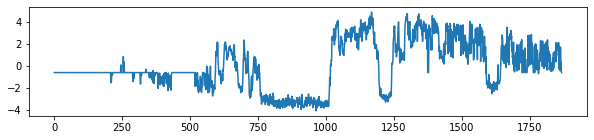

In [74]:
pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pearsonMT))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [571]:
oelog = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        oe[i,j] = rawMT[i,j] / expectMT[i,j]
        
oelog = logMT(oe)

In [592]:
pear = np.corrcoef(oe)

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [572]:
pear = pd.DataFrame(oe).corr()
pearlog = pd.DataFrame(oelog).corr()


In [586]:
pearlog1p = pd.DataFrame(np.log1p(oe)).corr()

In [573]:
pd.DataFrame(oelog)

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.950966,0.980821,0.913652,0.930348,0.680905,0.587917,0.737191,0.593291,0.726450,0.0
1865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.152340,1.180452,1.157455,1.101562,0.812036,0.737191,0.450589,0.528325,0.664621,0.0
1866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.983638,0.951857,0.759796,0.841310,0.853570,0.593291,0.528325,0.703485,1.089600,0.0
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.891234,0.587353,0.478323,0.398722,0.437755,0.726450,0.664621,1.089600,1.146354,0.0


In [574]:
pear

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021092,0.289016,0.108139,0.137522,0.205568,1.000000,0.198708,0.163429,0.059871,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016627,0.223890,0.058504,0.057769,0.028896,0.198708,1.000000,0.060874,0.040659,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034635,0.139964,0.031305,0.129900,0.050988,0.163429,0.060874,1.000000,0.028698,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018988,0.037034,0.069360,0.191164,0.093695,0.059871,0.040659,0.028698,1.000000,NaN


In [5]:
pear

NameError: name 'pear' is not defined

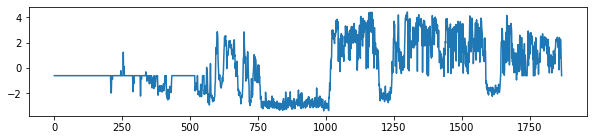

In [594]:
pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pear))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

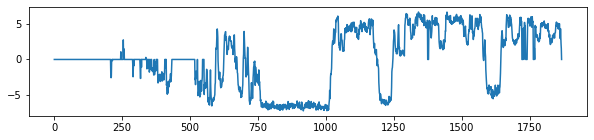

In [589]:
pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pearlog1p))
plt.figure(figsize=(10,2))
plt.plot(-b[:,0])

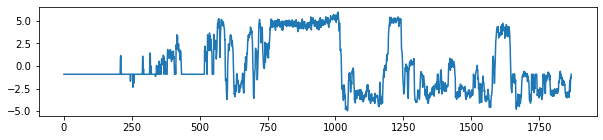

In [577]:
pca = PCA(n_components=5)
b=pca.fit_transform(np.nan_to_num(pearlog))
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

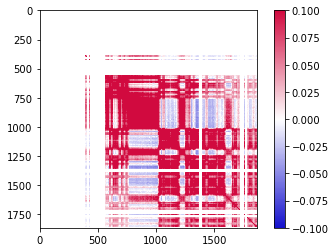

In [14]:
plt.imshow(pearsonMT,cmap=cmap2,clim=(-0.1,0.1))
plt.colorbar()

In [35]:
rawMT = ss.matrixwithNA
naRow = np.isnan(rawMT).any(axis=1)
NotnaRow = ~naRow

In [36]:
rawDF = pd.DataFrame(rawMT)
NornaIndex = rawDF.index[NotnaRow].values
NotnaDF = rawDF.loc[NornaIndex,NornaIndex]

no0index = NotnaDF.index[NotnaDF.sum(axis=1)>0].values
no0DF = NotnaDF.loc[no0index,no0index]

In [37]:
oMT = np.array(no0DF)
eMT = makeExpect(oMT)

In [38]:
logExpect = np.ma.log(eMT).filled(0)
logObserve = np.ma.log(oMT).filled(0)
oe = logObserve- logExpect

In [39]:
no0index

array([ 208,  209,  210, ..., 1865, 1866, 1867])

In [40]:
fullzero = pd.DataFrame(np.zeros((ss.matrixwithNA.shape[0], ss.matrixwithNA.shape[0])))
fullzero.loc[no0index,no0index] =  logExpect  

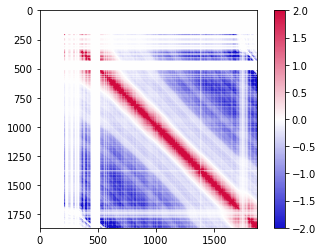

In [41]:
plt.imshow(fullzero,cmap=cmap2,clim=(-2,2))
plt.colorbar()

In [42]:
pear=np.corrcoef(oe)
fullzero = pd.DataFrame(np.zeros((ss.matrixwithNA.shape[0], ss.matrixwithNA.shape[0])))
fullzero.loc[no0index,no0index] = pear

In [43]:
fullzero

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717340,0.702260,0.721424,0.729444,0.718618,1.000000,0.710650,0.723627,0.676940,0.0
1865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.739752,0.723729,0.701724,0.723942,0.723748,0.710650,1.000000,0.713876,0.684622,0.0
1866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.704511,0.743863,0.719487,0.700337,0.711456,0.723627,0.713876,1.000000,0.679062,0.0
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.669187,0.675178,0.697400,0.683464,0.659238,0.676940,0.684622,0.679062,1.000000,0.0


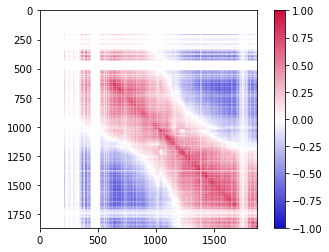

In [45]:
plt.imshow(fullzero,cmap=cmap2,clim=(-1,1))
plt.colorbar()

In [368]:
fullzero

,0,1,2,3,4,5,6,7,8,9,...,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.725864,0.794158,0.721336,0.738288,0.486694,0.331697,0.542981,0.401231,0.534134,0.0
1865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.912097,0.955350,0.970791,0.909247,0.619977,0.542981,0.194369,0.334114,0.472561,0.0
1866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.780886,0.711614,0.534694,0.654647,0.661255,0.401231,0.334114,0.447265,0.895390,0.0
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.696579,0.384601,0.238080,0.173621,0.251091,0.534134,0.472561,0.895390,0.890134,0.0


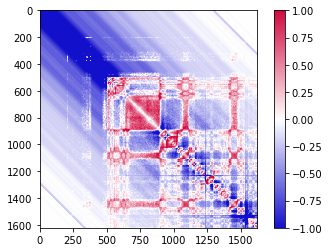

In [263]:
plt.imshow(oe,cmap=cmap2,clim=(-1,1))
plt.colorbar()

In [209]:
oe3 = np.log(oe2)
oe3[np.isinf(oe3)]=0

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


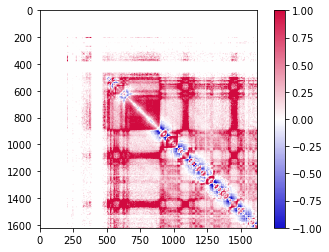

In [250]:
plt.imshow(oe3,cmap=cmap2,clim=(-1,1))
plt.colorbar()

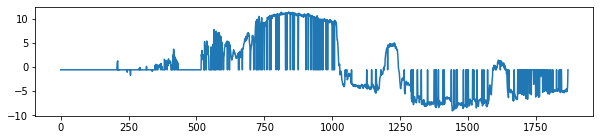

In [382]:



pca = PCA(n_components=5)
b=pca.fit_transform(fullzero)
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

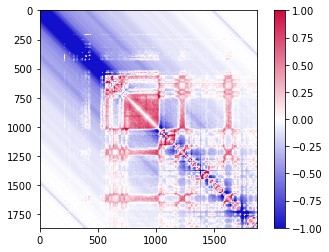

In [27]:
plt.imshow(oe,cmap=cmap2,clim=(-1,1))
plt.colorbar()

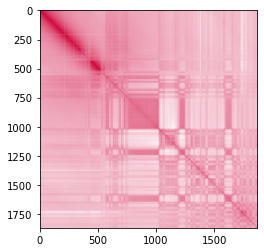

In [28]:
pear=np.corrcoef(np.nan_to_num(oe))
np.isnan(pear).sum()
plt.imshow(pear,cmap=cmap
          )

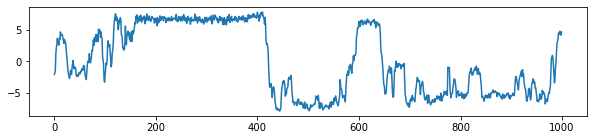

In [30]:
pca = PCA(n_components=5)
b=pca.fit_transform(pear[600:1600])
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [3]:
raw= ss.matrixwithNA
lograw=np.log1p(raw)
lograw[np.isnan(lograw)]=0
plograw= np.corrcoef(lograw)

removeNA=pd.DataFrame(plograw)
noNA=removeNA.index[~removeNA.isnull().all()]
newRaw = removeNA.loc[noNA,noNA]
aa=preprocessing.scale(newRaw,axis=1)

pca = PCA(n_components=5)
b=pca.fit_transform(aa)

/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/oukenkou/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


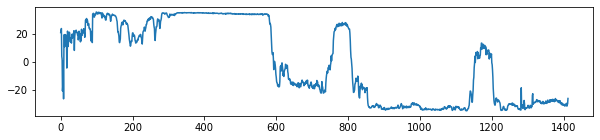

In [4]:
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

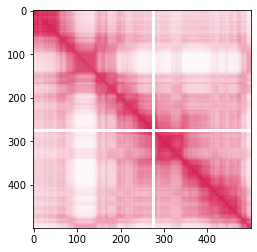

In [134]:
plt.imshow(plograw[1100:1600,1100:1600],cmap=cmap)

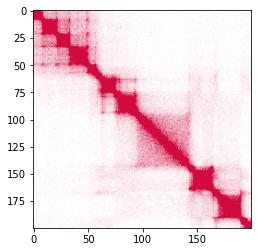

In [8]:
plt.imshow(ss.matrix[1100:1300,1100:1300],clim=[0,50],cmap=cmap)

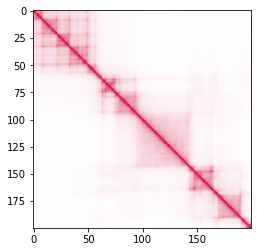

In [25]:
plt.imshow(pear.iloc[1100:1300,1100:1300],cmap=cmap)

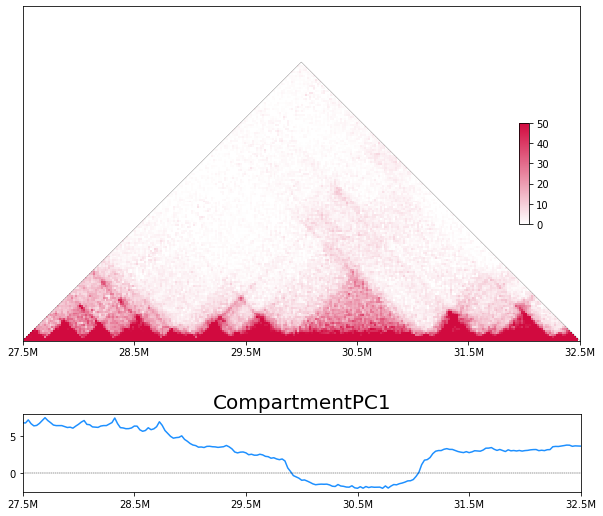

In [2]:
PlotBedGraph("test_data/Control_1/observed.KR.chr21.matrix.gz",25000,startSite=27500000,endSite=32500000,chr="chr21",clmax=50).draw("PC1")

In [4]:
plt.plot(a.T[1100:1300,1])

NameError: name 'a' is not defined

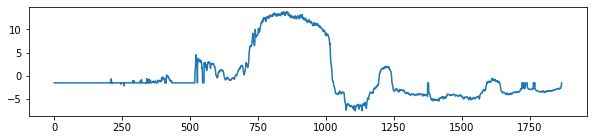

In [14]:
plt.figure(figsize=(10,2))
plt.plot(b[:,0])

In [52]:
np.log1p(0.1)-np.log1p(0.4)

-0.24116205681688807

In [53]:
np.log(0.1/0.4)

logObserve = np.ma.log(rawMT).filled(0)

-1.3862943611198906

In [239]:
y = [1,2,0,4,9,0,6,np.NaN]
z = [1,2,0,4,9,0,6,2]


In [240]:
np.corrcoef(y,z)

array([[nan, nan],
       [nan,  1.]])

In [257]:
cc

array([[1.0e+00, 2.0e+00,     nan],
       [0.0e+00, 3.0e-02, 4.5e+01]])

In [242]:
cc = np.array([[1,2,np.NaN],[0,0.03,45]])

In [260]:
out = np.zeros((2,3))
for i in range(cc.shape[0]):
    for j in range(cc.shape[1]):
        if cc[i,j] !=0: 
            out[i,j]=np.log(cc[i,j])

In [278]:
np.isnan(cc[0,2])

True

In [387]:
sum(cc)

array([1.  , 2.03,  nan])

In [389]:
y[4:10]

[9, 0, 6, nan]

In [404]:
np.log1p(0.01)-np.log1p(0.1)

-0.08535984895115678

In [405]:
np.log(0.01)-np.log(0.1)

-2.3025850929940455

In [549]:
y>0

TypeError: '>' not supported between instances of 'list' and 'int'

In [40]:
test = np.log(np.nan_to_num(oe))

/Users/wangjiankang/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [47]:
test[np.isinf(test)]=0

In [48]:

test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70348485, 1.08960027,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.08960027, 1.14635366,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [165]:
import numpy as np
a = [1,5,7,2,4,7]
b = [5,2,6,8,3,6]
np.corrcoef(a,b)

array([[ 1.        , -0.10939874],
       [-0.10939874,  1.        ]])

In [167]:
-np.array(a)

array([-1, -5, -7, -2, -4, -7])

In [24]:
np.corrcoef(np.log1p(a),np.log1p(b))

array([[ 1.        , -0.18268443],
       [-0.18268443,  1.        ]])

In [38]:
for i in range(20):
    a.append(np.NaN)
    b.append(np.NaN)
    
np.corrcoef(a,b)

array([[nan, nan],
       [nan, nan]])

In [9]:
c = pd.DataFrame([[1,2,3,7,44],[2,3,5,22,np.NaN],[2,3,np.NaN,6,76]])

In [10]:
c = np.array(c)
#c[[0,1],[0,2,3]]

In [12]:
c.sum()

nan

In [24]:
c.iloc[[0,1],[0,2,3]]

,0,2,3
0,1,3.0,7
1,2,5.0,22


In [56]:
c.T.corr()

,0,1,2
0,1.000000,0.982591,0.996666
1,0.982591,1.000000,0.980426
2,0.996666,0.980426,1.000000


In [64]:
c[True,False,True]

KeyError: (True, False, True)

In [58]:
np.corrcoef([2,3,22],[2,3,6])

array([[1.        , 0.98042624],
       [0.98042624, 1.        ]])

In [121]:
[range(10)]

[range(0, 10)]

In [8]:
np.zeros((10,10)) *np.NaN

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [11]:
a = [1,np.NaN]

In [12]:
sum(a)

nan

In [15]:
min(1,2,0)

0